In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl #Some more style nonsense
from scipy.stats import linregress #linear regression
from scipy.optimize import curve_fit

mpl.rcParams['figure.figsize'] = [16.0, 9.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=300 # dots per inch

from Spectrav4 import spectra #Main tool

#import data
ch_Co,Co = np.loadtxt("Co60.txt",delimiter=',',unpack= True)
#bkg = np.loadtxt("18oct2021_bkg_ortec.txt")
ch_Bi,Bidata = np.loadtxt("Bi207.txt",delimiter=',',unpack= True)

print(np.shape(Co),np.shape(Bidata))

(16051,) (16384,)


In [2]:
no1 = spectra(Co,label = "Co60")
Bi = spectra(Bidata,label = "Bi207")

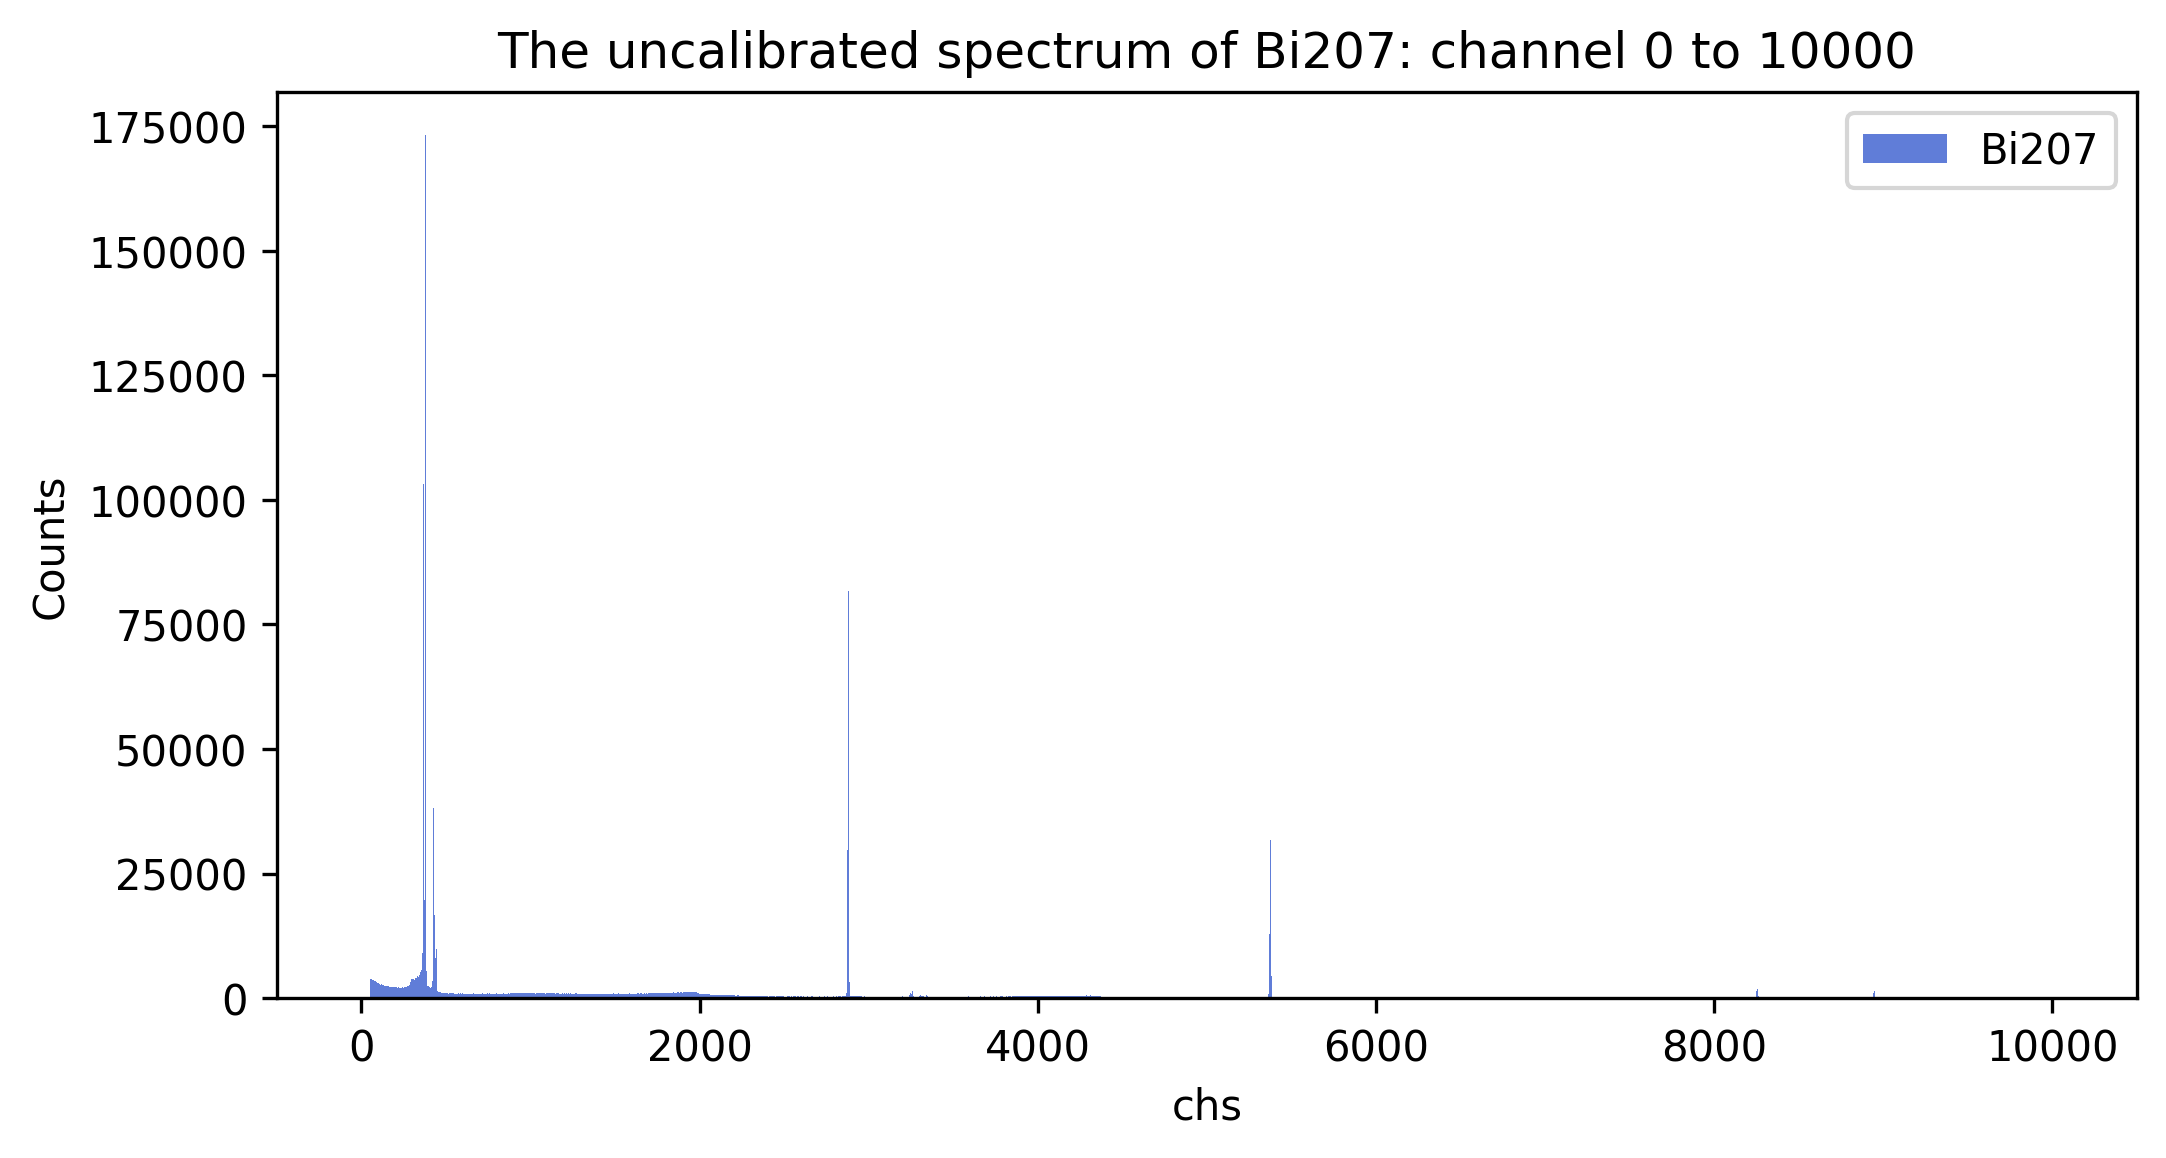

In [3]:
Bi.cali_exam(0,10000)

Photopeaks (ch) of Co60
peak1 = 5928.446018+- 0.031109

peak2 = 6733.351150+- 0.037165

Photopeaks (ch) of Bi207
peak1 = 2878.355346+- 0.024831

peak2 = 5374.825460+- 0.029705

peak3 = 8945.714228+- 0.058178



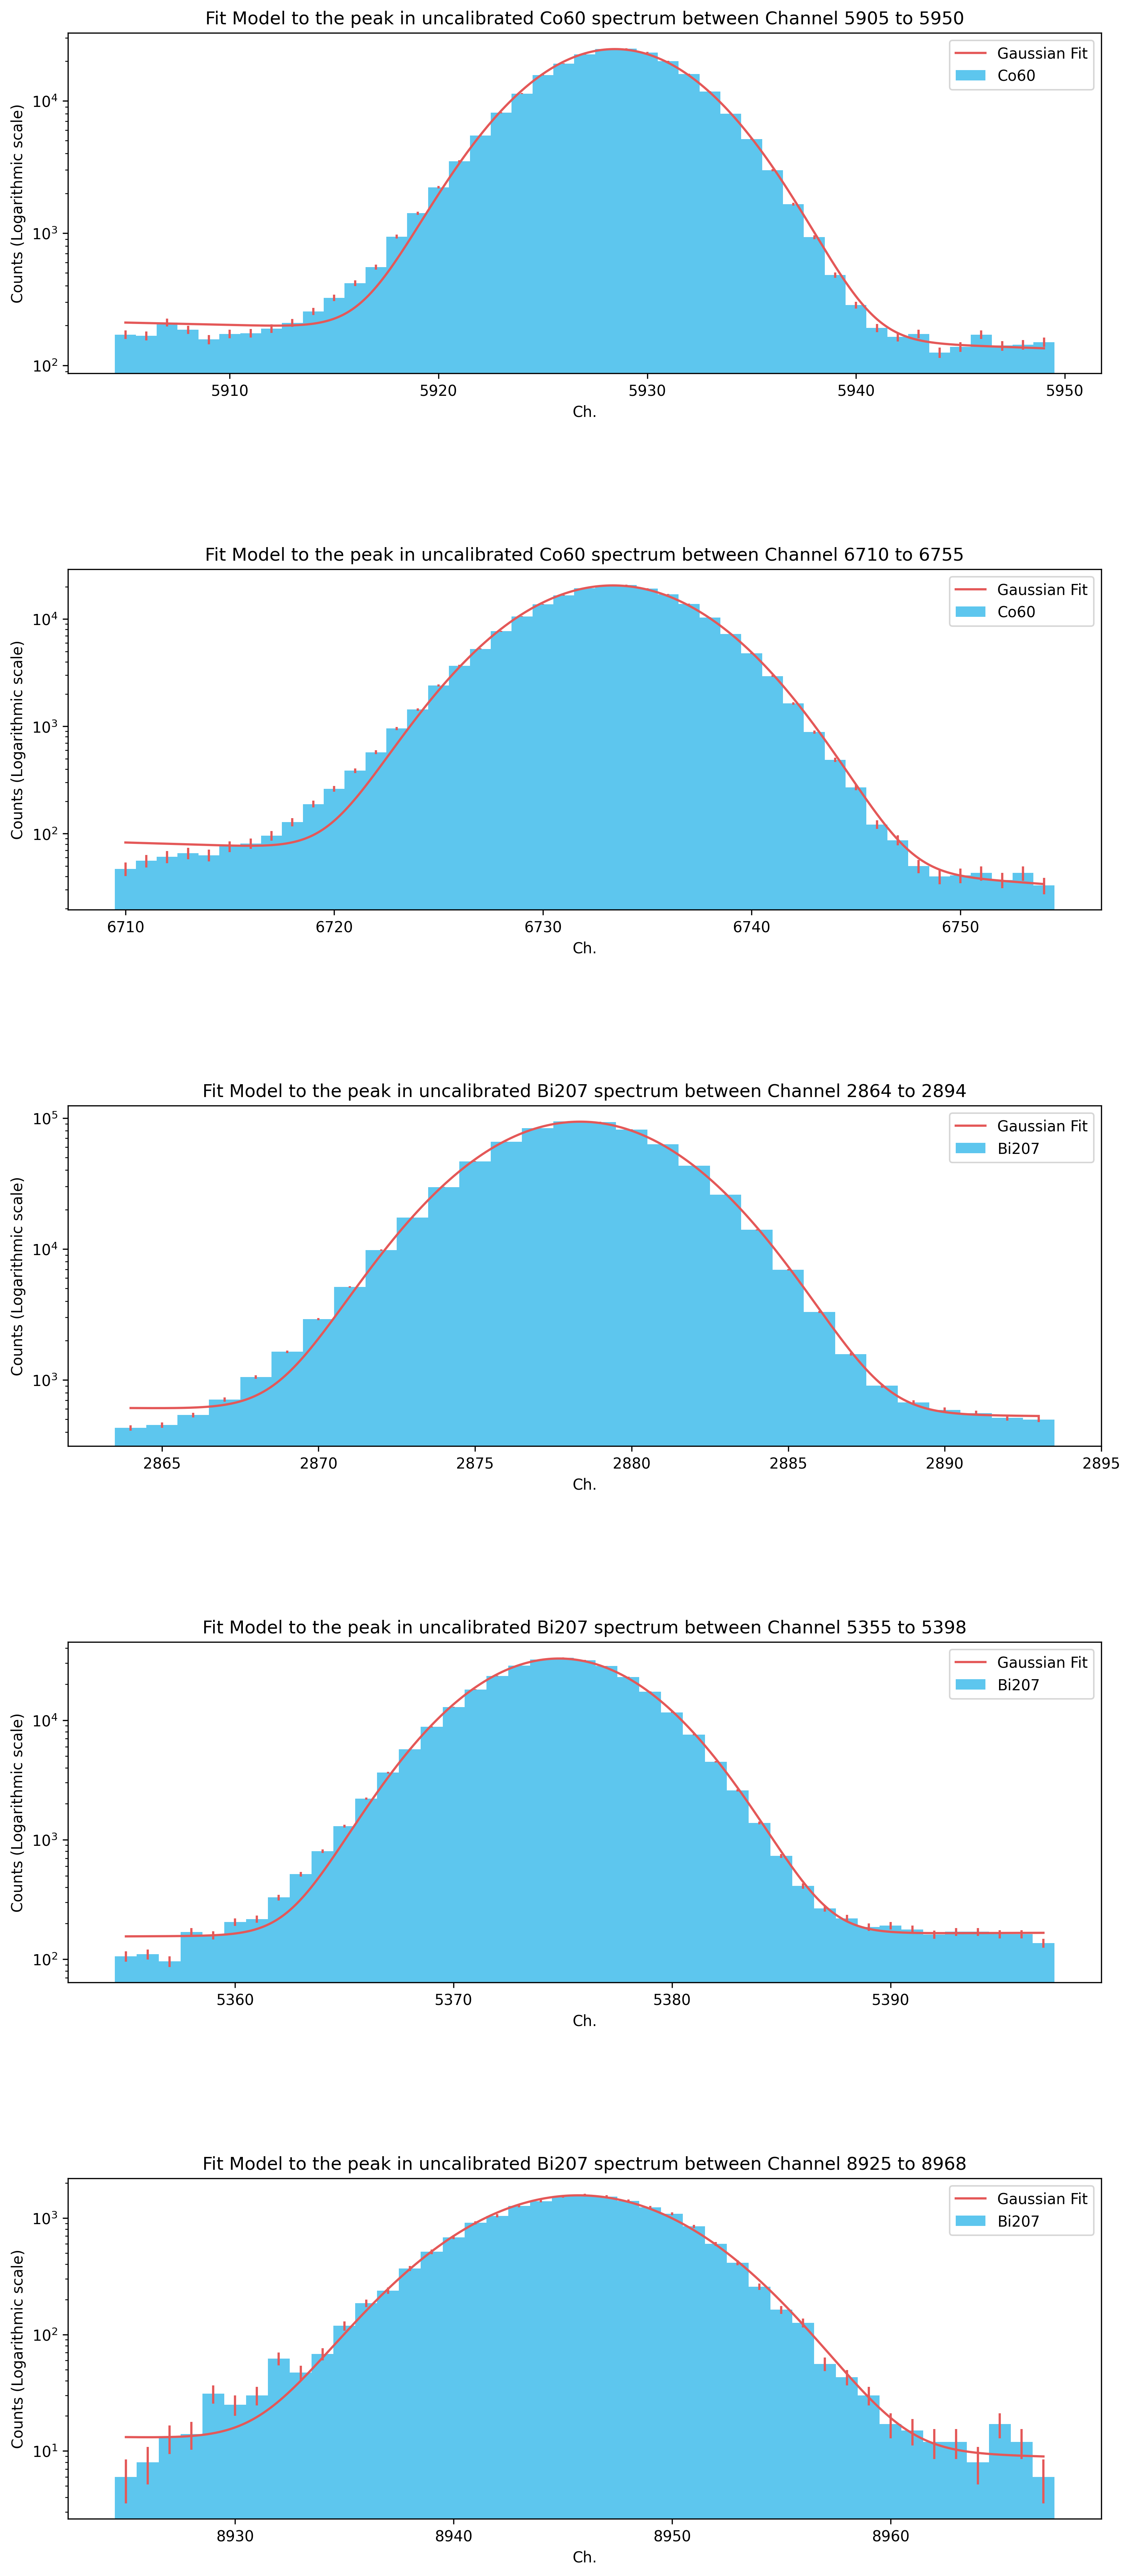

In [4]:
fig, ax = plt.subplots(5)
fig.tight_layout(pad = 0)
fig.set_size_inches(10, 25)

#fit and plot peaks
p = np.zeros([5,2])

for i,x in enumerate([[5905,5950],[6710,6755]]):
    p[i] = no1.cali_fit_peak(*x,plot=True,plotoffset = 0,axs = ax[i])

for i,x in enumerate([[2864,2894],[5355,5398],[8925,8968]]):
    p[i+2] = Bi.cali_fit_peak(*x,plot=True,plotoffset = 0,axs = ax[i+2])

#initialization
no1.cali_clear_peaks()
Bi.cali_clear_peaks()

#input cali peaks
no1.cali_add_peaks(p[0:2])
Bi.cali_add_peaks(p[2:5])

#show results
no1.cali_print_peaks()
Bi.cali_print_peaks()

Photopeaks (ch)
peak1 = 2878.355346+- 0.024831

peak2 = 5374.825460+- 0.029705

peak3 = 5928.446018+- 0.031109

peak4 = 6733.351150+- 0.037165

peak5 = 8945.714228+- 0.058178



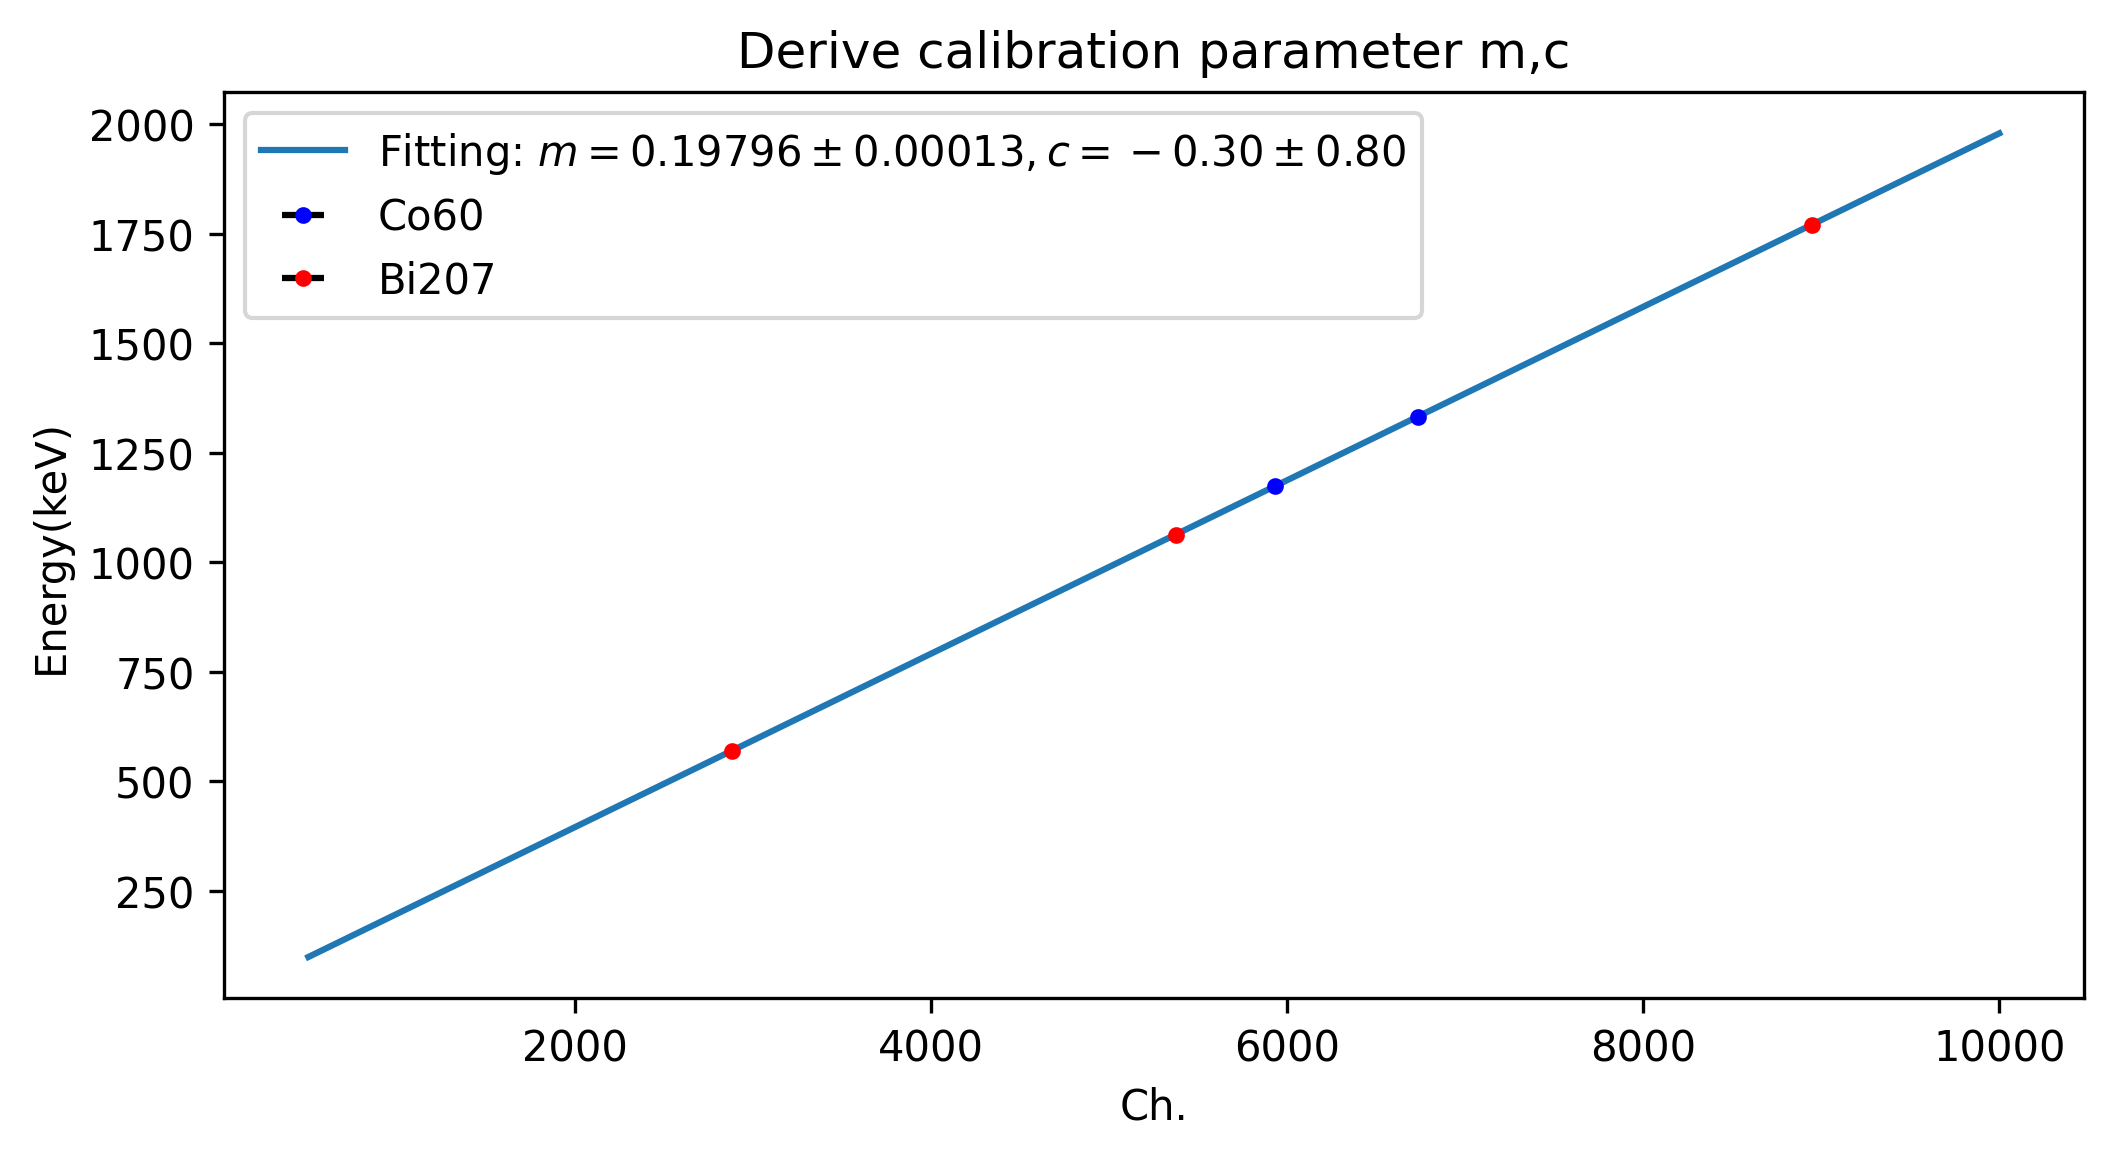

In [5]:
#a functional spectra which records peaks from both Co and Bi 
#and thus capable of fitting on all 5 points for calibration parameters
Empty = spectra(Co)
Empty.cali_add_peaks(no1.cali_peaks)
Empty.cali_add_peaks(Bi.cali_peaks)

#show peaks
Empty.cali_print_peaks()

Empty.get_cali([570,1063,1173.2,1332.5,1771],deg = 1)

#==============================================================================================

#plot the fitting(distinguish Co60 and Bi207)
fig, axs = plt.subplots()
axs.errorbar(no1.cali_peaks[:,0],[1173.2,1332.5],xerr=no1.cali_peaks[:,1],fmt='b.',ecolor = "black",label = "Co60")#error bar too small
axs.errorbar(Bi.cali_peaks[:,0],[570,1063,1771],xerr=Bi.cali_peaks[:,1],fmt='r.',ecolor = "black",label = "Bi207")#error bar too small
x_line = np.linspace(500,10000,100)
axs.plot(x_line,Empty.c[0] + Empty.m[0]*x_line + Empty.q[0]*x_line**2,label = "Fitting: $m = {0:.{b}f}\pm {1:.{b}f},c = {2:.{c}f}\pm {3:.{c}f}$"
                                                .format(Empty.m[0],Empty.m[1],Empty.c[0],Empty.c[1],b = 5,c = 2))

axs.set_ylabel("Energy(keV)")
axs.set_xlabel("Ch.")

axs.set_title("Derive calibration parameter m,c")
axs.legend()

In [6]:
no1.get_E_scale(*Empty.cali_info(printout = False))
Bi.get_E_scale(*Empty.cali_info(printout = False))#passing calibration

no1.cali_info()
Bi.cali_info()

Calibration constants in Co60 spectra
m = 0.197959+- 0.000127
c = -0.298230+- 0.797334
p = 0.000000+- 0.000000

Calibration constants in Bi207 spectra
m = 0.197959+- 0.000127
c = -0.298230+- 0.797334
p = 0.000000+- 0.000000



([0.19795894576512366, 0.0001268059820933243],
 [-0.2982296257046073, 0.7973343386515223],
 [0, 0])

Photopeaks
peak1 = 569.497194+- 0.004333

peak2 = 1063.695984+- 0.005281

peak3 = 1173.290466+- 0.006025

peak4 = 1332.628257+- 0.006873

peak5 = 1770.584403+- 0.010015

FWHMs
The FWHM of the peak1 = 1.359682+- 0.007807

The FWHM of the peak2 = 1.693645+- 0.009485

The FWHM of the peak3 = 1.720614+- 0.011020

The FWHM of the peak4 = 1.824414+- 0.012163

The FWHM of the peak5 = 2.099292+- 0.017991

N_ps
The N_p of the peak1 = 93078.534510+- 856.221692

The N_p of the peak2 = 32598.972304+- 293.636788

The N_p of the peak3 = 24455.837709+- 244.802317

The N_p of the peak4 = 20526.392485+- 223.440974

The N_p of the peak5 = 1551.667390+- 21.230197



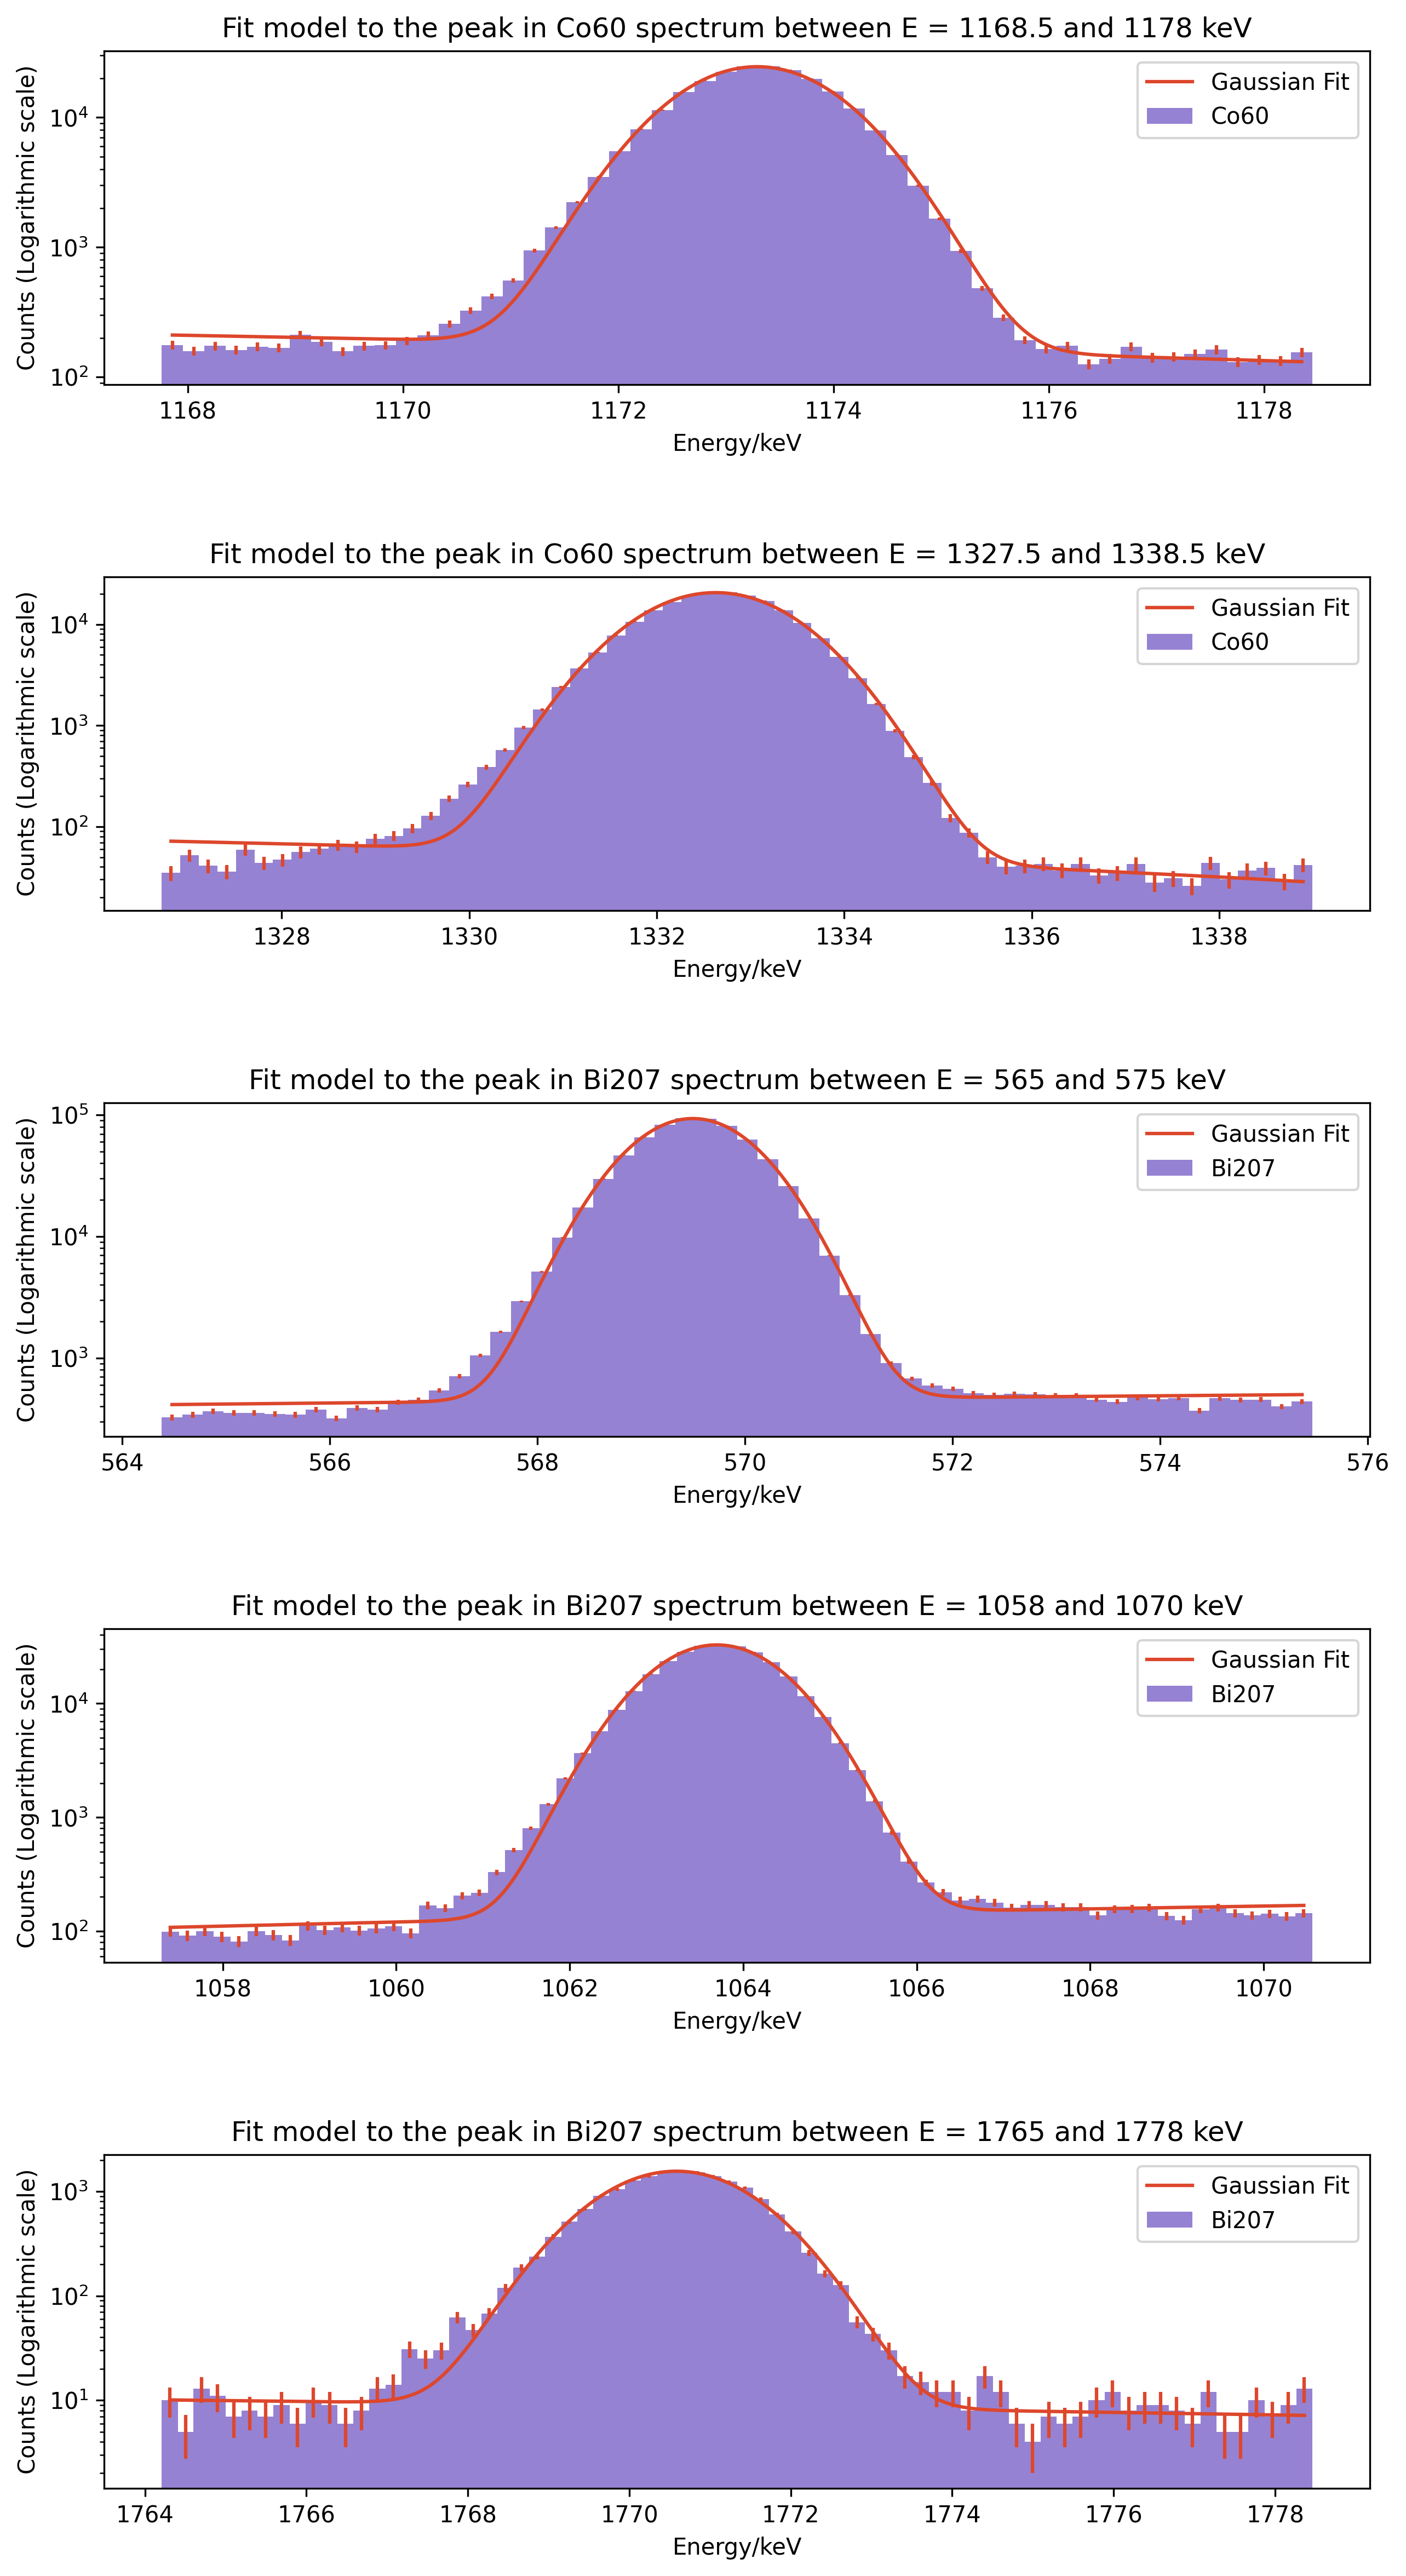

In [7]:
#initialize
Empty.clear_records()
no1.clear_records()
Bi.clear_records()


#Fit and plot the peaks
fig, ax = plt.subplots(5)
fig.tight_layout(pad = 0)
fig.set_size_inches(8,16)

p = np.zeros([5,2,3])

for i,x in enumerate([[1168.5,1178],[1327.5,1338.5]]):
    p[i] = no1.fit_peak(*x,plot=True,axs = ax[i],width = 0.2)

for i,x in enumerate([[565,575],[1058,1070],[1765,1778]]):
    p[i+2] = Bi.fit_peak(*x,plot=True,axs = ax[i+2],width =0.2)

#Input fitted peaks
no1.record_popts(p[0:2])
Bi.record_popts(p[2:5])
#input all popts to empty
Empty.record_popts(p)

#show results
Empty.print_peaks()
Empty.print_FWHMs()
Empty.print_As()

No handles with labels found to put in legend.


       w_e and w_d determine the energy resolution      
w_e = 0.8379524867380561 +- 0.024515365728795837

w_d = 0.044726939886133035 +- 0.00047751139482397843


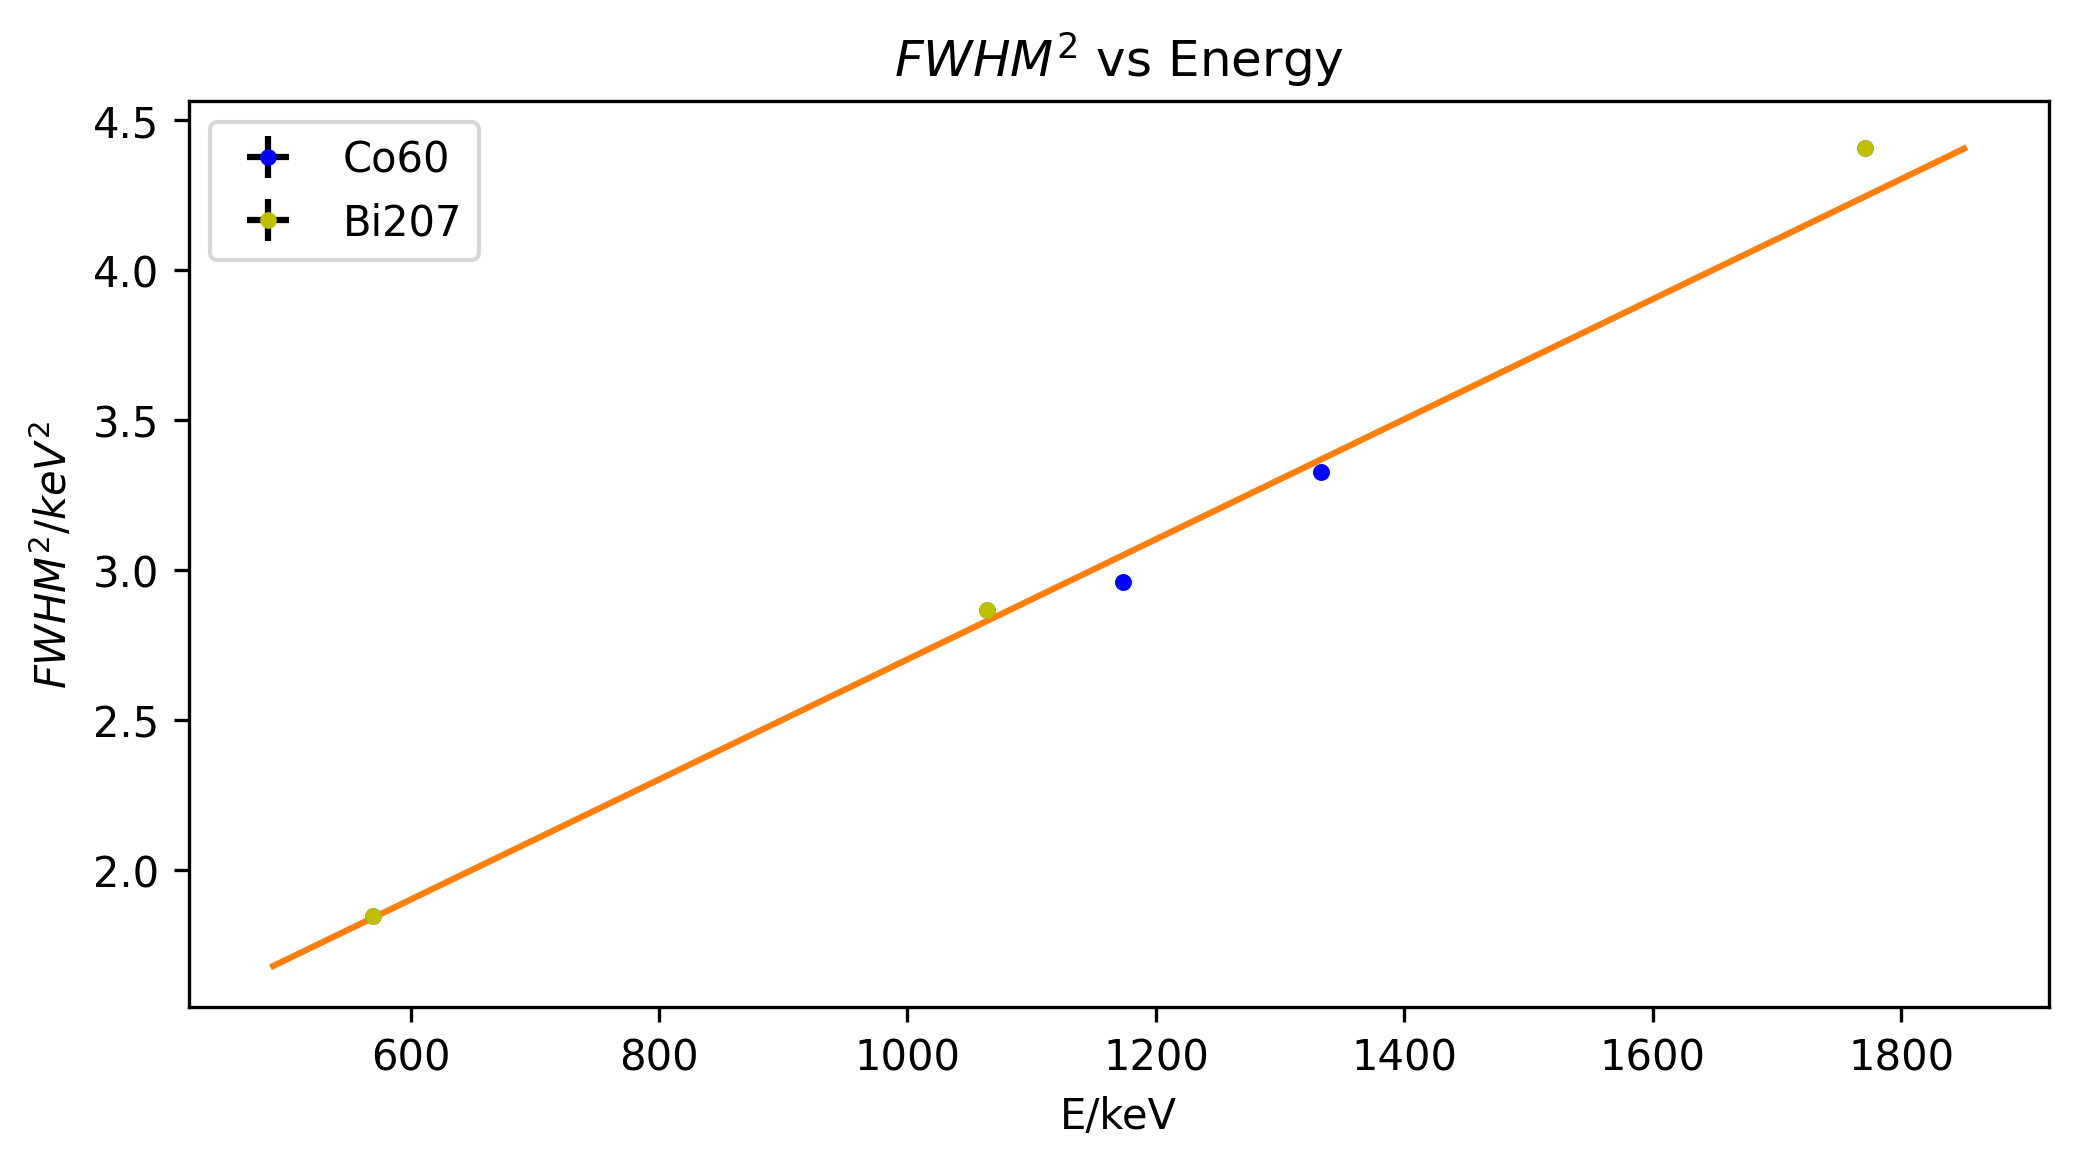

In [8]:
#Fit and plot the resolution curve to the data (5pts in total)
fig, axs = plt.subplots()
popt=Empty.Fit_Resolution(axs,fmt='.')  
#two data sets  
axs.errorbar(no1.Samplepeaks[:,0],no1.Sample_FWHMs[:,0]**2,xerr=no1.Samplepeaks[:,1],
                    yerr=no1.Sample_FWHMs[:,1],fmt='b.',ecolor = "black",label = "Co60")
axs.errorbar(Bi.Samplepeaks[:,0],Bi.Sample_FWHMs[:,0]**2,xerr=Bi.Samplepeaks[:,1],
                    yerr=Bi.Sample_FWHMs[:,1],fmt='y.',ecolor = "black",label = "Bi207")  
axs.legend()            

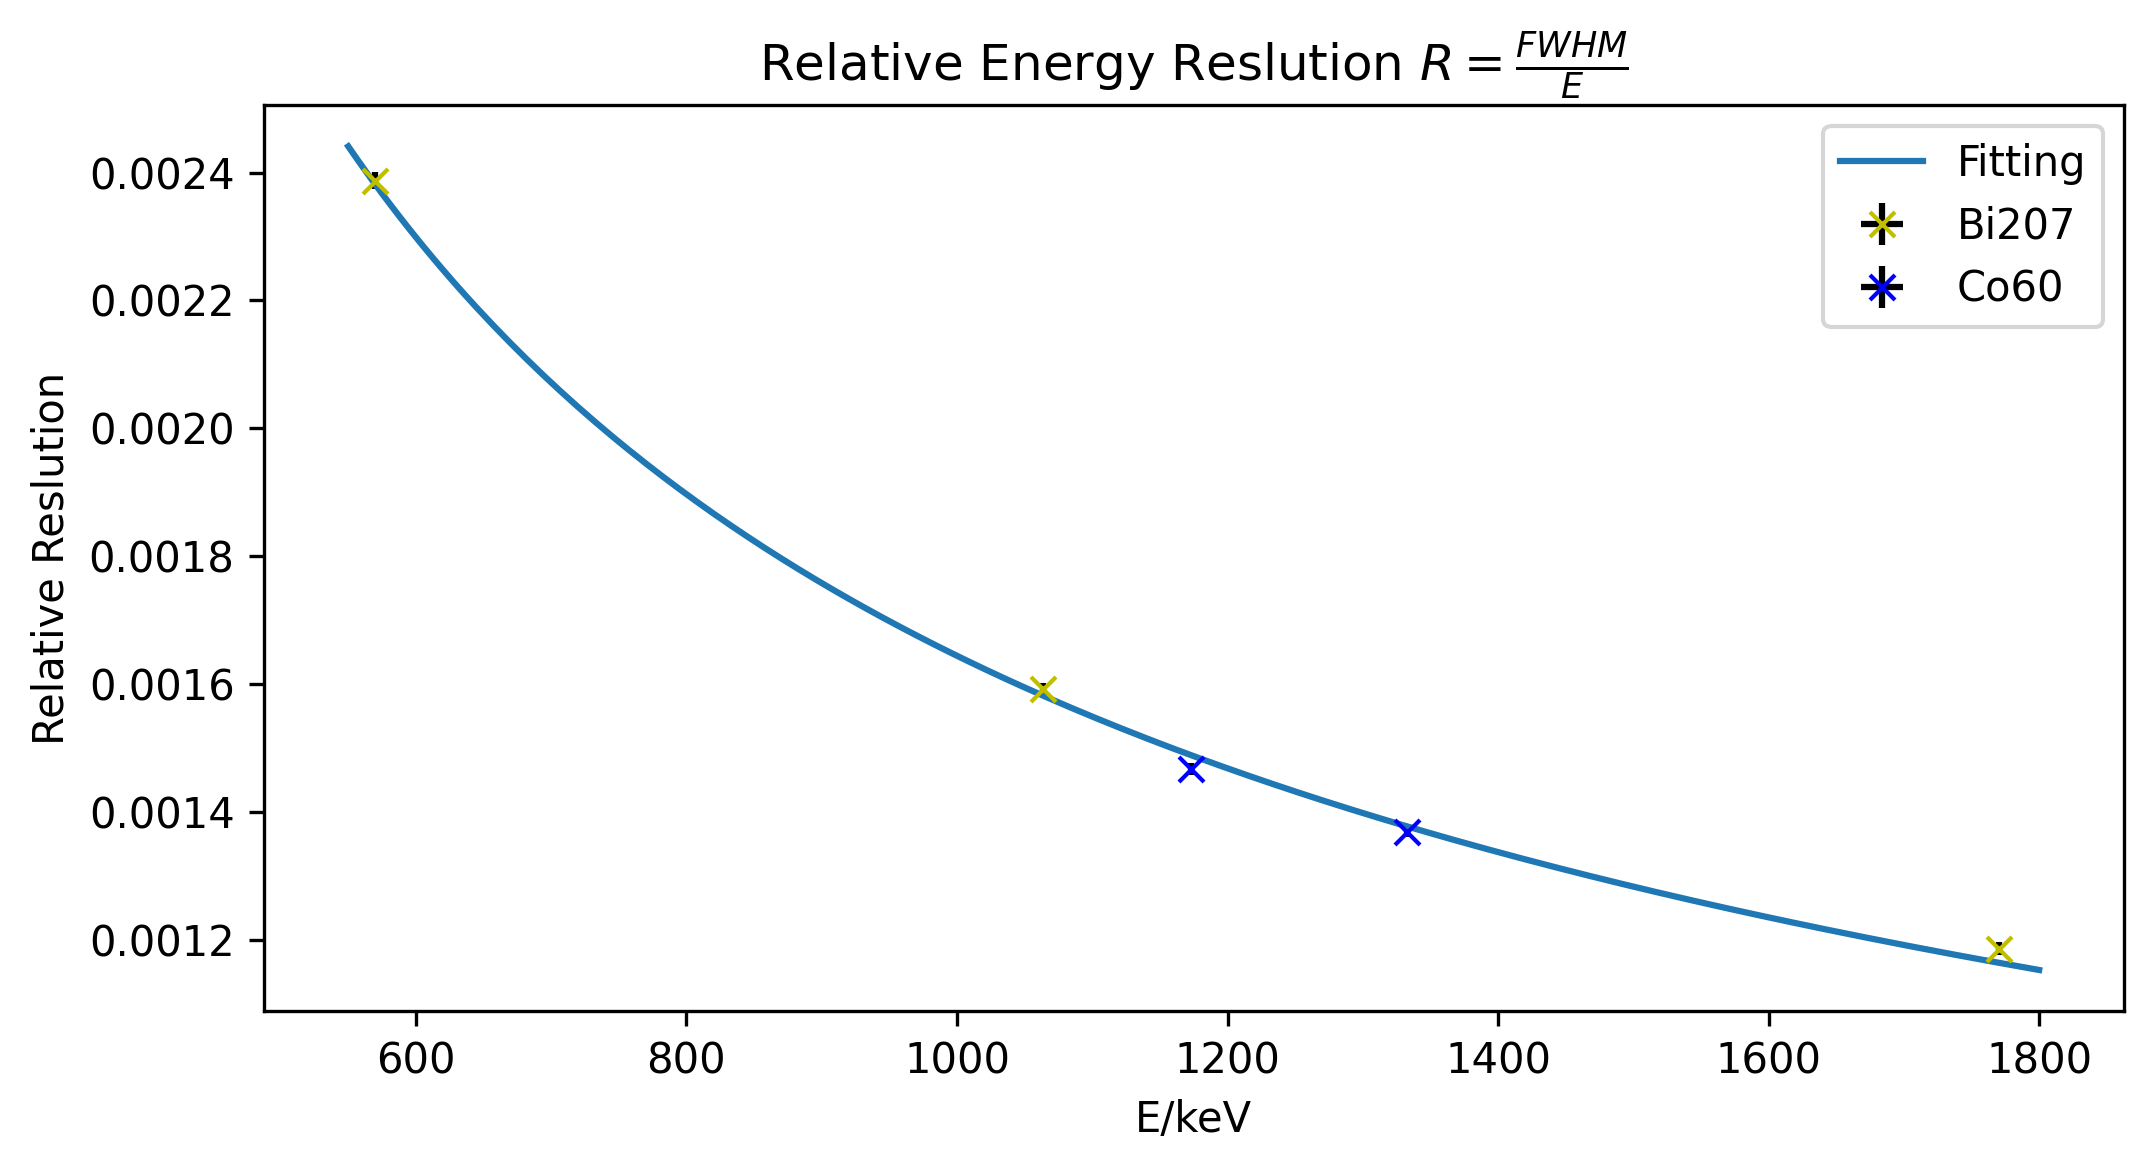

In [9]:
#Plot Relative efficiency curve to data points
fig, axs = plt.subplots()
x = np.linspace(550,1800,200)
axs.errorbar(x,Empty.Resolution(x)[0],label = "Fitting")
#two data sets
axs.errorbar(Bi.Samplepeaks[:,0],Bi.Sample_FWHMs[:,0]/Bi.Samplepeaks[:,0],xerr=Bi.Samplepeaks[:,1],
                    yerr=Bi.Sample_FWHMs[:,1]/Bi.Samplepeaks[:,0],fmt='yx',ecolor = "black",label = "Bi207")
axs.errorbar(no1.Samplepeaks[:,0],no1.Sample_FWHMs[:,0]/no1.Samplepeaks[:,0],xerr=no1.Samplepeaks[:,1],
                    yerr=no1.Sample_FWHMs[:,1]/no1.Samplepeaks[:,0],fmt='bx',ecolor = "black",label = "Co60")

axs.set_ylabel("Relative Reslution")
axs.set_xlabel("E/keV")

axs.set_title("Relative Energy Reslution $R = \\frac{FWHM}{E}$")
axs.legend()

In [15]:
print("For E >> {}, an approximation can be applied.".format((popt[1,0]/popt[0,0])**2))#Approximation for E>>this number
print("Relative resolution we measured are {}, compare to that in the mannual: {}.".format(Empty.Resolution(1332)[0],1.68/1332)) 

For E >> 350.99458526473626, an approximation can be applied.
Relative resolution we measured are 0.0013775466668922325, compare to that in the mannual: 0.0012612612612612612.
